In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [68]:
df = pd.read_csv("Desktop/project_dataset/social media influencers - youtube.csv")

In [69]:
df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [70]:
df.shape

(1000, 8)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     1000 non-null   object
 1   channel name      1000 non-null   object
 2   Category          723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience Country  839 non-null    object
 5   avg views         1000 non-null   object
 6   avg likes         962 non-null    object
 7   avg comments      791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


In [72]:
df.describe()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
count,1000,1000,723,1000,839,1000,962,791
unique,998,998,23,228,27,743,615,420
top,PrestonPlayz,Bollywood Classics,Music & Dance,10.1M,United States,1.1M,1.2K,1.8K
freq,2,2,224,34,291,18,17,14


In [73]:
df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [76]:
#cheking null column
df.isnull().sum()

youtuber name       0
channel name        0
Category            0
Subscribers         0
Audience Country    0
avg views           0
avg likes           0
avg comments        0
dtype: int64

In [75]:
df.fillna(df.mode().iloc[0],inplace=True)

In [77]:
#dealing with millions and thousands values of column

In [78]:
df['Subscribers'] = df['Subscribers'].str.replace('M', '').astype(float) * 1000000


In [86]:
df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212100000.0,India,323700.0,9800.0,290.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000.0,United States,13800000.0,80900.0,1800.0
2,setindia,SET India,Music & Dance,130400000.0,India,23600.0,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111400000.0,United States,1400000.0,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92500000.0,United States,30600000.0,1700000.0,67700.0


In [84]:
def converter(value):
    if "M" in value:
        return float(value.replace("M",""))*1000000
    elif "K" in value:
        return float(value.replace("K",""))*1000
    else:
        return float(value)



In [83]:
df["avg views"] = df["avg views"].apply(converter)
df["avg likes"] = df["avg likes"].apply(converter)
df["avg comments"] = df["avg comments"].apply(converter)

In [85]:
df.dtypes

youtuber name        object
channel name         object
Category             object
Subscribers         float64
Audience Country     object
avg views           float64
avg likes           float64
avg comments        float64
dtype: object

In [87]:
df.describe()

,Subscribers,avg views,avg likes,avg comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,1.740430e+07,1.102656e+06,5.017522e+04,3025.178000
std,1.380312e+07,3.438304e+06,2.113731e+05,13599.930485
min,9.200000e+06,0.000000e+00,5.000000e+00,1.000000
25%,1.070000e+07,5.470000e+04,1.200000e+03,96.750000
50%,1.325000e+07,2.672500e+05,5.400000e+03,770.500000
75%,1.825000e+07,9.282000e+05,3.680000e+04,1800.000000
max,2.121000e+08,8.050000e+07,5.600000e+06,313600.000000


In [88]:
# which channel has more subscribers

In [100]:
subscribers = df.sort_values("Subscribers",ascending=False)
subscribers = subscribers.head(10)

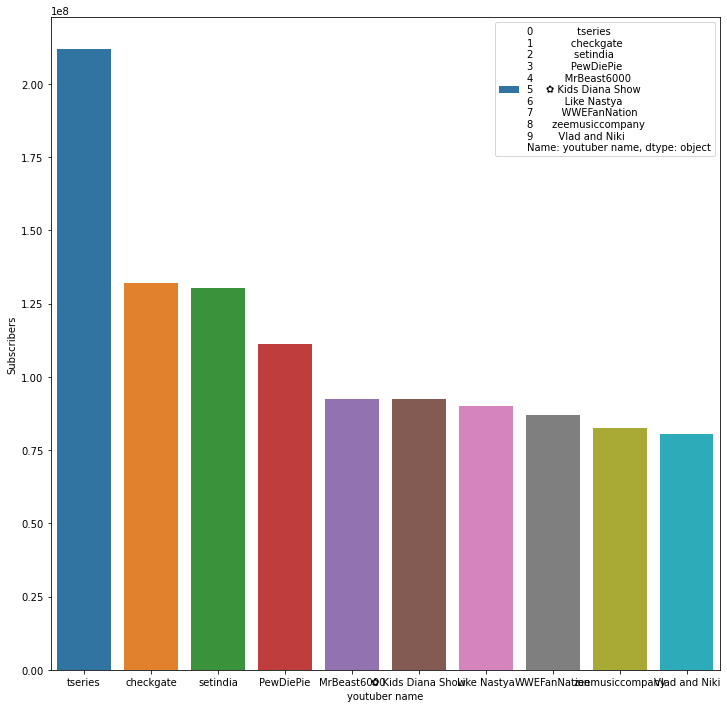

In [110]:
plt.figure(figsize=(12,12))
sns.barplot(x="youtuber name",y="Subscribers" ,data=subscribers,label=subscribers["youtuber name"])
plt.legend()

In [112]:
#conclusion : t-series is most subscribers

In [113]:
 #which Country Audience to be most use youtube

In [115]:
audians = df.groupby("Audience Country").sum().sort_values("avg views",ascending=False)

In [122]:
audians.reset_index(inplace=True)

In [124]:
audians =audians.head(10)

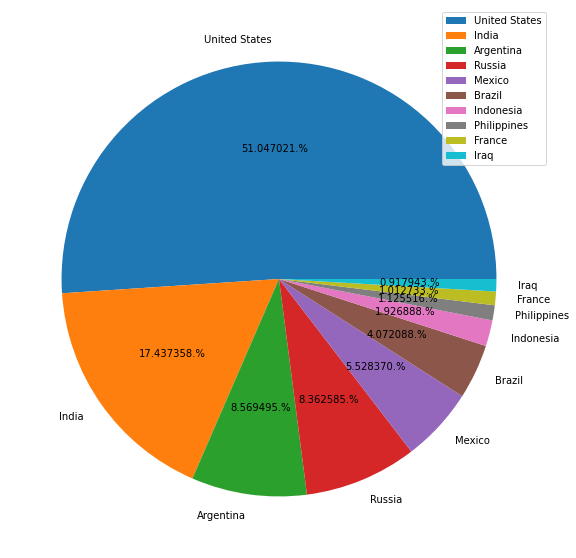

In [143]:
plt.figure(figsize=(10,10))
plt.pie(audians["avg views"],labels=audians["Audience Country"],autopct="%f.%%");
plt.legend()

In [144]:
#conclusion USA have 51 % audieans 


<AxesSubplot:xlabel='Audience Country', ylabel='avg views'>

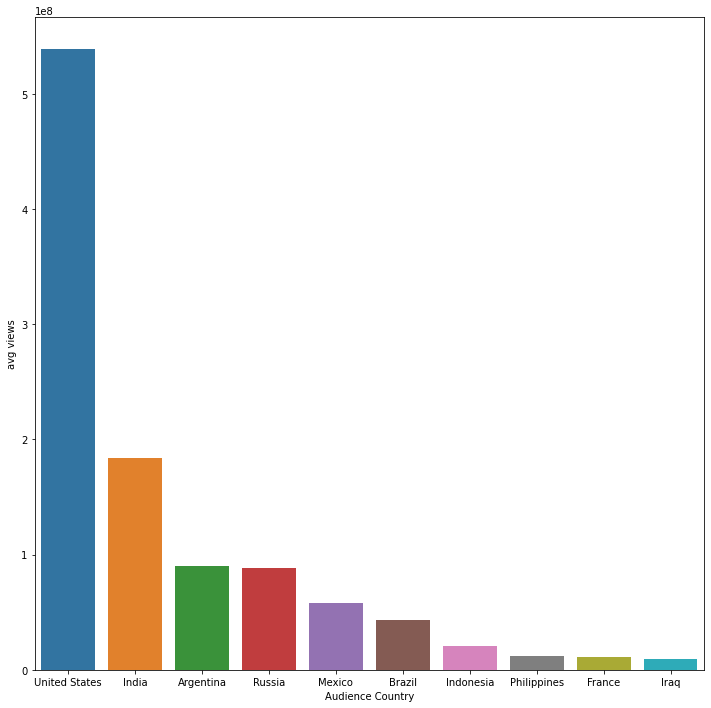

In [145]:
plt.figure(figsize=(12,12))
sns.barplot(x="Audience Country",y="avg views" ,data=audians)


In [146]:
df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212100000.0,India,323700.0,9800.0,290.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000.0,United States,13800000.0,80900.0,1800.0
2,setindia,SET India,Music & Dance,130400000.0,India,23600.0,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111400000.0,United States,1400000.0,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92500000.0,United States,30600000.0,1700000.0,67700.0


In [147]:
#which catagory videos most views

In [149]:
df.groupby("Category").sum().sort_values("avg views",ascending=False)

,Subscribers,avg views,avg likes,avg comments
Category,,,,
Music & Dance,9.066600e+09,461379073.0,21442622.0,1461864.0
Animation,1.965100e+09,152512800.0,5370580.0,295978.0
Video games,1.400900e+09,150744400.0,8205389.0,353183.0
Humor,4.198000e+08,48324900.0,2802328.0,144586.0
Education,6.920000e+08,46210800.0,1390170.0,106109.0
Movies,6.382000e+08,40439800.0,2512177.0,135349.0
Daily vlogs,5.449000e+08,38103100.0,2098586.0,116210.0
Toys,7.705000e+08,35984800.0,606671.0,57160.0
Sports,1.404000e+08,27754100.0,916654.0,8927.0


In [150]:
#Music & Dance is most views

In [151]:
df.corr()

,Subscribers,avg views,avg likes,avg comments
Subscribers,1.000000,0.131120,0.052108,0.027122
avg views,0.131120,1.000000,0.907473,0.776407
avg likes,0.052108,0.907473,1.000000,0.853813
avg comments,0.027122,0.776407,0.853813,1.000000


<AxesSubplot:>

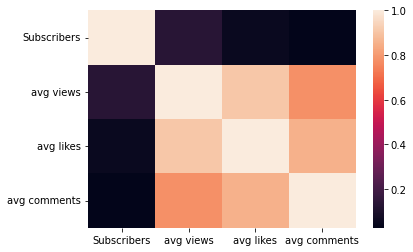

In [153]:
sns.heatmap(df.corr())

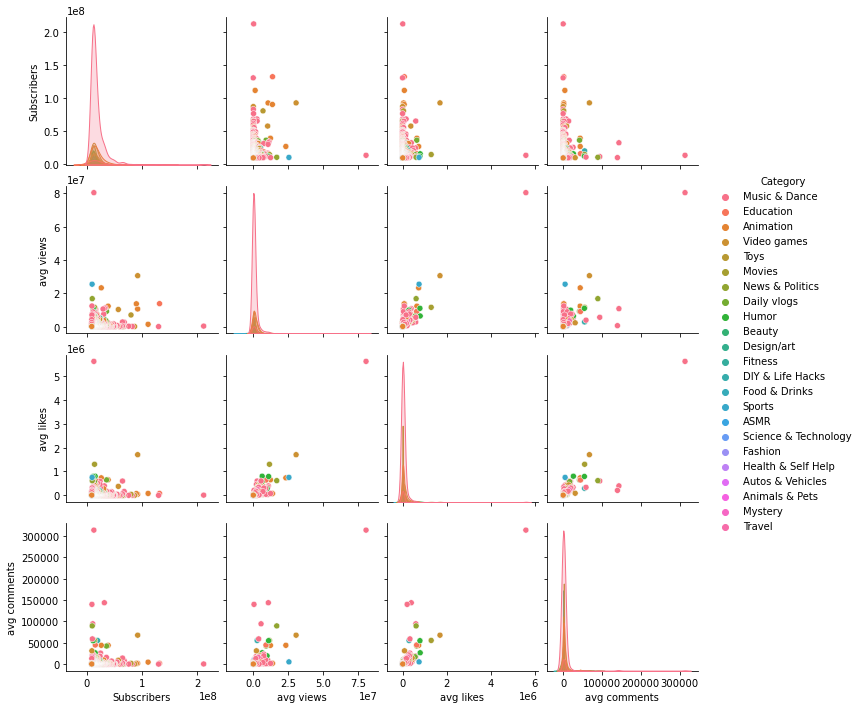

In [156]:
sns.pairplot(df,hue="Category")

In [157]:
df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212100000.0,India,323700.0,9800.0,290.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000.0,United States,13800000.0,80900.0,1800.0
2,setindia,SET India,Music & Dance,130400000.0,India,23600.0,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111400000.0,United States,1400000.0,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92500000.0,United States,30600000.0,1700000.0,67700.0


In [160]:
df["total"] = df["avg views"] + df["avg likes"] + df["avg comments"]

In [161]:
df.total

0        333790.0
1      13882700.0
2         23935.0
3       1485400.0
4      32367700.0
          ...    
995     1512600.0
996      275136.0
997      307074.0
998       16112.0
999      122346.0
Name: total, Length: 1000, dtype: float64

In [162]:
df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,total
0,tseries,T-Series,Music & Dance,212100000.0,India,323700.0,9800.0,290.0,333790.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000.0,United States,13800000.0,80900.0,1800.0,13882700.0
2,setindia,SET India,Music & Dance,130400000.0,India,23600.0,314.0,21.0,23935.0
3,PewDiePie,PewDiePie,Animation,111400000.0,United States,1400000.0,80800.0,4600.0,1485400.0
4,MrBeast6000,MrBeast,Video games,92500000.0,United States,30600000.0,1700000.0,67700.0,32367700.0


In [176]:
mostliked = df.sort_values("total",ascending=False)[:10]

In [177]:
mostliked.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,total
503,Bizarrap,Bizarrap,Music & Dance,13100000.0,Argentina,80500000.0,5600000.0,313600.0,86413600.0
4,MrBeast6000,MrBeast,Video games,92500000.0,United States,30600000.0,1700000.0,67700.0,32367700.0
862,whoisjimmy,How Ridiculous,Sports,9900000.0,United States,25500000.0,750300.0,5200.0,26255500.0
118,MrBeast Gaming,MrBeast Gaming,Animation,26500000.0,United States,23300000.0,732000.0,44000.0,24076000.0
844,вДудь,вДудь,News & Politics,10100000.0,Russia,16800000.0,615500.0,89400.0,17504900.0


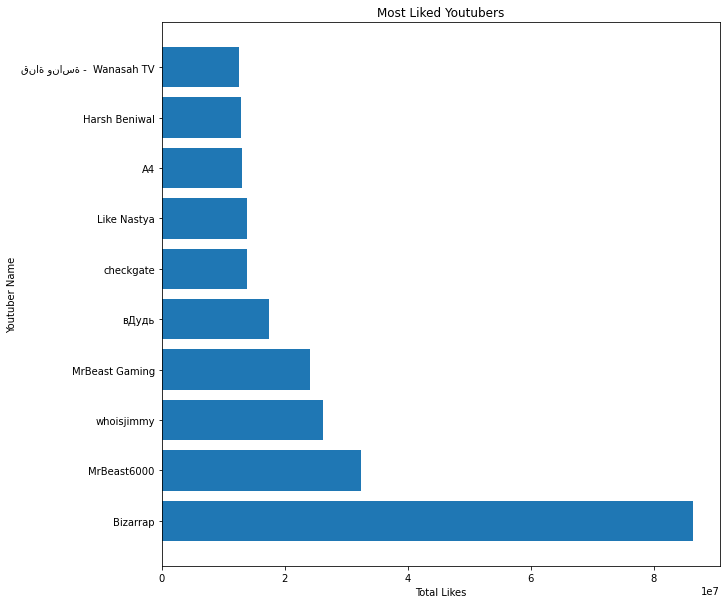

In [188]:
plt.figure(figsize=(10,10))
plt.barh(mostliked["youtuber name"], mostliked["total"])
plt.xlabel("Total Likes")
plt.ylabel("Youtuber Name")
plt.title("Most Liked Youtubers")
plt.show()